`Pytorch` 提供了两个基础数据类型，用于将用户的数据集代码与模型训练的代码解耦。它们分别是：`torch.utils.data.DataLoader` 和 `torch.utils.data.Dataset`。`Dataset` 存放样本及其标签，`DataLoader` 用于从 `Dataset` 中抽取数据样本。`Dataset` 可以是任何用户自定义的类，只要它实现了 `__len__` 和 `__getitem__` 方法即可。`DataLoader` 是一个可迭代对象，它将 `Dataset` 返回的每一条数据拼接成一个批次（batch），并提供多线程加速优化和数据打乱等操作。`DataLoader` 还提供了对数据样本的自定义采样器（Sampler）接口，用户可以自定义样本读取的顺序，或者根据样本的类别对数据进行分组等操作。

`torch.utils.data.Dataset` 包含了以下三种示例数据：
- Image Datasets
- Text Datasets
- Audio Datasets

In [6]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
'''
加载一个示例数据集
root is the path where the train/test data is stored,
train specifies training or test dataset,
download=True downloads the data from the Internet if it's not available at root.
transform and target_transform specify the feature and label transformations
'''

training_data = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



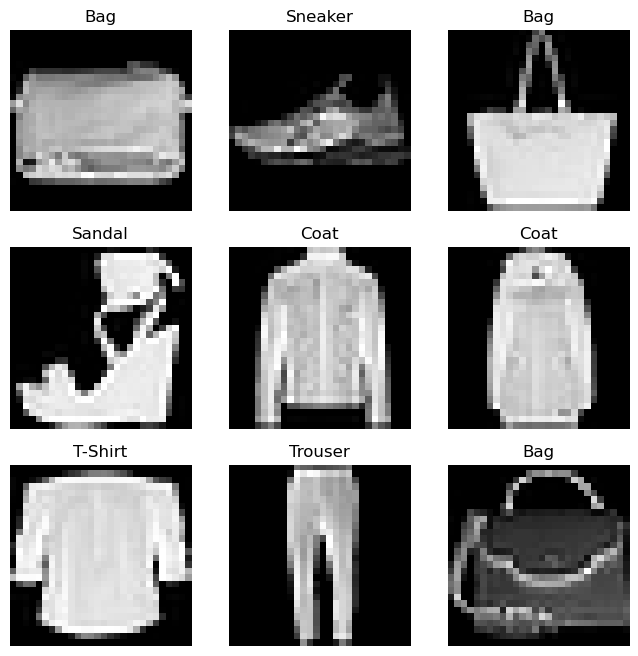

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


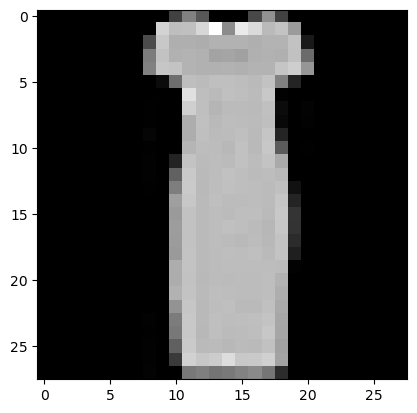

Label: 3


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 正规化（Normalization）
Normalization changes the range of data, without distorting its distinction among out feature. This pre-processing is to avoid:

- A reduction of the prediction accuracy
- Difficulty for the model to learn
- Unfavorable distribution of the feature data ranges

# Transforms
Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (transform to modify the features and target_transform to modify the labels) that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

'''
The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded(一位有效编码) tensors. To make these transformations, we use ToTensor and Lambda.
'''
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

```
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
```
define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter which assigns a value=1 on the index as given by the label y. You can also use torch.nn.functional.one_hot as another option to do that.